In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

La magia de matplotlib notebook, es muy útil para hacer plots visibles, pero es un poco complicada de usar, ya que requiere cerrar cada plor para poder continuar.

Alternativamente, se puede usar la magia de %matplotlib inline, que es más sencillas, ya que muestra el gráfico original en el jupyter notebook. Para modificar el tamaño de los plots en este caso, basta con cambiar el parámetro general de matplotlib figure.figsize al tamaño de gráfico deseado (en pulgadas).

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)

In [3]:
vehiculos = pd.read_pickle("./vehiculos.3.variables_agrupadas.pkl")

In [4]:
vehiculos.dtypes

fabricante                object
modelo                    object
year                       int64
desplazamiento           float64
cilindros                float64
transmision               object
traccion                  object
clase                     object
combustible               object
consumo                    int64
co2                      float64
clase_tipo              category
traccion_tipo           category
transmision_tipo        category
combustible_tipo        category
tamano_motor_tipo       category
consumo_tipo            category
co2_tipo                category
consumo_litros_milla     float64
dtype: object

### Distribución de variables numéricas

Usamos histogramas para ver la distribución de una variable

<AxesSubplot:ylabel='Frequency'>

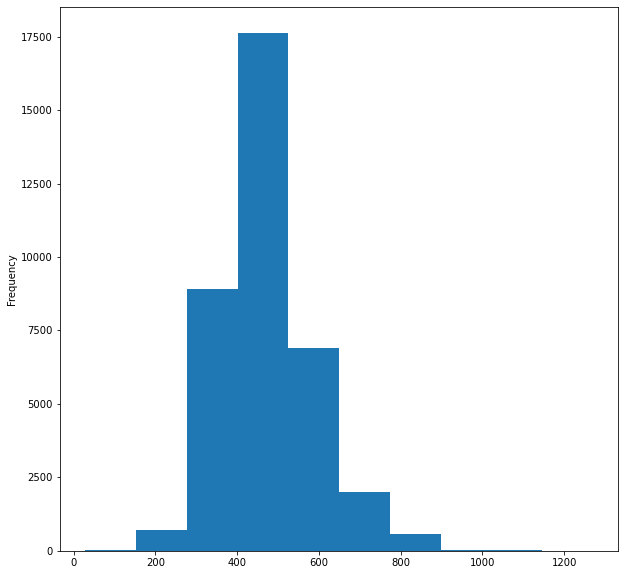

In [6]:
vehiculos["co2"].plot.hist()

Alternativamente podemos hacer un gráfico KDE (Kernel Density Estimate) que produce una función estimada de la distribución de la variable (Función de densidad de probabilidad).

<AxesSubplot:ylabel='Density'>

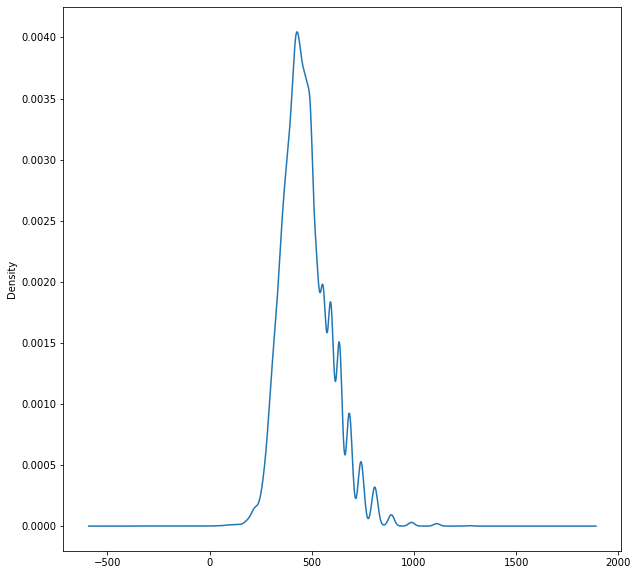

In [7]:
vehiculos["co2"].plot.kde()

In [8]:
def distribucion_variable_numerica(df, col):
    df[col].plot.kde()
    plt.xlabel("Distribución de la variable {}".format(col))
    plt.show()

Ahora podemos usar pywidgets para poder analisar las distribuciones más cómodamente. Tiene sentido hacer estos gráficos sólo para variables numéricas.
El método para `pandas.select_dtype` devuelve aquellas columnas de unos tipos específicos.

In [9]:
columnas_numericas = vehiculos.select_dtypes(["int64", "float64"]).columns

In [10]:
from ipywidgets import interact, fixed

In [11]:
interact(distribucion_variable_numerica, col=columnas_numericas, df=fixed(vehiculos))

interactive(children=(Dropdown(description='col', options=('year', 'desplazamiento', 'cilindros', 'consumo', '…

<function __main__.distribucion_variable_numerica(df, col)>

Vemos que la variable *cilindros* pese a ser numérica, no tiene una distribución equilibrada de valores.

In [13]:
vehiculos["cilindros"].value_counts(normalize=True)

4.0     0.381184
6.0     0.350767
8.0     0.220344
5.0     0.020115
12.0    0.015630
3.0     0.006252
10.0    0.004132
2.0     0.001359
16.0    0.000217
Name: cilindros, dtype: float64

Parece que gran parte de las variables siguen una distribución normal. Que las variables siguen una distribución normal es importantes, dado que muchos agoritmos asumen que la distribución de las variables es normal.

La distribución normal tiene esta forma:

![Distribución normal](https://www.researchgate.net/profile/Pedro-Romero-Aroca/publication/275021043/figure/fig1/AS:294595071102976@1447248346180/Distribucion-normal-y-sus-porcentajes-respecto-de-la-desviacion-estandar.png)

Podemos comprobar esto con un gráfico de probabilidad.

La función de `scipy.stats probplot` compara la distribución de una variable con una distribución teórica (la normal por defecto), cuánto más se parezca la gráfica a una línea de 45 grados, más normal será.

In [14]:
from scipy import stats

In [15]:
def normalidad_variable_numerica(df, col):
    stats.probplot(df[col], plot=plt)
    plt.xlabel("Diagrama de Probabilidad(normal) de la variable {}".format(col))
    plt.show()

In [18]:
interact(normalidad_variable_numerica, col=columnas_numericas, df=fixed(vehiculos))

interactive(children=(Dropdown(description='col', options=('year', 'desplazamiento', 'cilindros', 'consumo', '…

<function __main__.normalidad_variable_numerica(df, col)>

Parece que siguen una distribución normal, no obstante, conviene asegurarse haciendo un test de normalidad. En un test de normalidad, lo que queremos es rechazar la hipótesis nula de que la variable a analizar se ha obtenido de una población que sigue una distribución normal. Para un nivel de confianza de 95%, rechazamos la hipótesis nula si el *p-value* es inferior a 0.05. Esto es, si se obtiene un valor P (p-value) menor de 0.05, significa que las probabilidades de que la hipótesis nula sean ciertas es tan baja (menos de un 5%) que la rechazamos.

scipy tiene la función `normaltest`que devuelve el p-value.

In [19]:
for num_col in columnas_numericas:
    _, pval = stats.normaltest(vehiculos[num_col])
    if pval < 0.05:
        print("Columna {} no sigue una distribución normal.".format(num_col))

Columna year no sigue una distribución normal.
Columna consumo no sigue una distribución normal.
Columna co2 no sigue una distribución normal.
Columna consumo_litros_milla no sigue una distribución normal.


Con lo cual vemos que ninguna de las variables numéricas siguen una distribución normal correcta.

### Distribución variables categóricas

Una manera de ver cómo se distribuyen las variables categóricas es mediante la función `pandas.value_counts`. Dicha función nos devuelve el número de records existentes para cada valor de una columna.

In [20]:
def distribucion_variable_categorica(df, col):
    df[col].value_counts(ascending=True, normalize=True).tail(20).plot.barh()
    plt.show()

In [21]:
columnas_categoricas = vehiculos.select_dtypes(['object', 'category']).columns

In [22]:
interact(distribucion_variable_categorica, col=columnas_categoricas, df=fixed(vehiculos))

interactive(children=(Dropdown(description='col', options=('fabricante', 'modelo', 'transmision', 'traccion', …

<function __main__.distribucion_variable_categorica(df, col)>

### Conclusiones

- Ninguna variable numérica sigue una distribución normal
- La variable numérica *cilindros* tiene una distribución de valores discretos no balanceados (cilindros de 2,4 y 8 suman el 95% de los vehiculos). Podría agruparse como variante categórica (2,4,8 y otro).
- EL fabricante con la mayor cantidad de modelos es Chevrolet (10% del total)
- 65% de los vehiculos usan gasolina normal
- La distribución de tamaños de motor, consumo y co2 está equilibrada en todo el rango.
- 70% de los vehiculos usan tracción a las dos ruedas.
- Dos tercios de los coches tienen transmisión automática
- La clase mayoritaria de vehículos es la de coches pequeños (35% del total).
- Los mayores fabricantes en cuando a vehiculos análizados son los estadounidenses. Eso tiene sentido, ya que la EPA es la agencia americana y probablemente es el que tiene más interés en estudiar coches de USA.